In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)
import vis_utils as vut

## How Student's t-distribution arises from sampling

Let X<sub>1</sub>, ..., X<sub>n</sub> be independent and identically distributed random variables (e.g. hight)~ N(μ, σ<sup>2</sup>), i.e. X<sub>1</sub>, ..., X<sub>n</sub> is a sample of size n from a normally distributed population with expected mean value μ and variance σ<sup>2</sup>.

In a concrete example below, we have a population of 10 thousand individuals. The mean height is 180 cm and standard deviation is 10 cm. Next we use the function `np.random.choice` to randomly sample (without replacement) n individuals from the population:

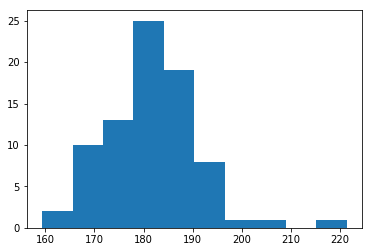

In [2]:
population_size = 10000
mu = 180
sigma = 10
population = np.random.normal(mu, sigma, population_size)

n = 80
X = np.random.choice(population, n, replace=False)

plt.figure(1)
_ = plt.hist(X)

Let

$$
{\displaystyle {\bar {X}}={\frac {1}{n}}\sum _{i=1}^{n}X_{i}}
$$

be the sample mean and let

$$
{\displaystyle S^{2}={\frac {1}{n-1}}\sum _{i=1}^{n}(X_{i}-{\bar {X}})^{2}}
$$

be the (Bessel-corrected) sample variance. 

In [3]:
def sample_mean(X):
    X_bar = (1 / X.size) * X.sum()
    return X_bar
    

def sample_variance(X):
    var = (1 / (X.size - 1)) * np.sum((X - sample_mean(X))**2)
    return var

Then the random variable Z

$$
{\displaystyle {Z = \frac {{\bar {X}}-\mu }{\sigma /{\sqrt {n}}}}}
$$

has a standard normal distribution (i.e. normal with expected value 0 and variance 1), because the expected value of X_bar is equal to the sample mean. More simply, if we sampled more and more from the population and took the difference between population mean and each sample mean and divided by standard error (the standard deviation of the distribution of the sampling means) we would approach a distribution with mean 0 and s.d. 1, i.e. the normal distribution:

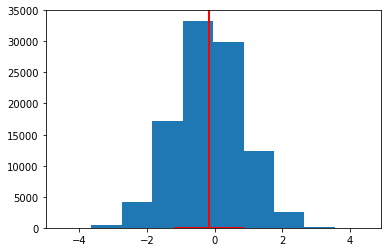

In [9]:
Z = []
for i in range(100000):
    X = np.random.choice(population, n, replace=False)
    X_bar = sample_mean(X)
    Z.append(
        (X_bar - mu) / (sigma / np.sqrt(n))
        )
Z = np.array(Z)

plt.figure(2)
_ = plt.hist(Z)
plt.axvline(Z.mean(), c='r', lw=2)
_ = plt.plot([Z.mean()-np.std(Z), Z.mean()+np.std(Z)], [0.1,0.1], c='r', lw=2)

In reality, we don't know the population parameters, so we use sample-based estimates and the random variable

$$
{\displaystyle {T = \frac {{\bar {X}}-\mu }{S/{\sqrt {n}}}}}
$$

(where S has been substituted for σ ) has a Student's t-distribution with n − 1 degrees of freedom. Note that the numerator and the denominator in the preceding expression are independent random variables, which can be proven by induction.

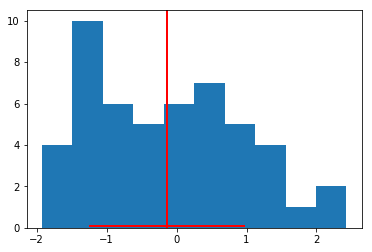

In [8]:
T = []
for i in range(50):
    X = np.random.choice(population, n, replace=False)
    X_bar = sample_mean(X)
    var = sample_variance(X)
    T.append(
        (X_bar - mu) / (np.sqrt(var) / np.sqrt(n))
        )
T = np.array(T)

plt.figure(3)
_ = plt.hist(T)
plt.axvline(T.mean(), c='r', lw=2)
_ = plt.plot([T.mean()-np.std(T), T.mean()+np.std(T)], [0.1,0.1], c='r', lw=2)

# Derivatives

<IPython.core.display.Javascript object>


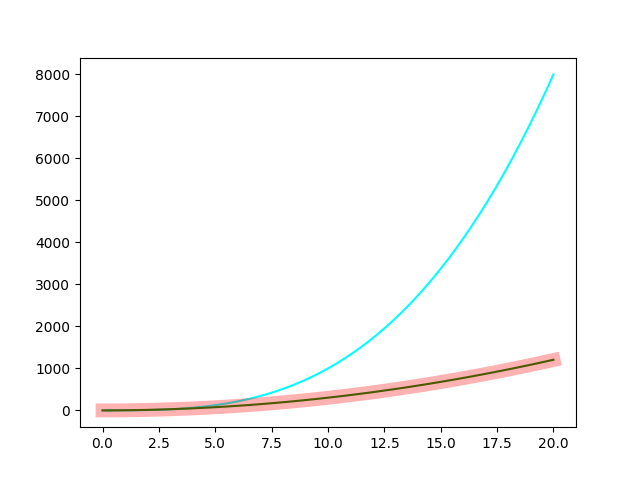

In [57]:
def sigmoid(x, K=1, A=0, C=1, Q=1, B=1, nu=1):
    return A + (K-A)/(C + Q*np.exp(-B*x))**(1/nu)

def dist_f(x, K=120, A=0, C=5, Q=110, B=2, nu=1):
    return A + (K-A)/(C + Q*np.exp(-B*x))**(1/nu)

dist_f = lambda x: x**3

time = np.linspace(0,20,100)

dt = .1

v = (dist_f(time+dt)  - dist_f(time)) / dt


plt.figure('derivative')
line, = plt.plot(time, dist_f(time), color='cyan')
line, = plt.plot(time, v, color='green')
line, = plt.plot(time, 3*time**2, color='red', alpha=.3, lw=10)

<IPython.core.display.Javascript object>


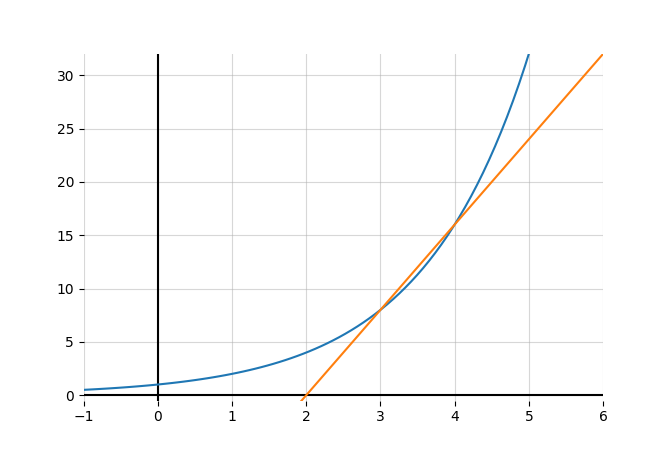

In [111]:
fig = plt.figure(12, figsize=[6.7,4.5])
ax = fig.add_subplot(111)
ax.grid(True, alpha=.5)
ax.set_xlim(-1,6)
ax.set_ylim(-.5, 32)
ax.axvline(0, color='k'); ax.axhline(0, color='k')
vut.despine(ax, 'top,right,left,bottom'.split(','))

def line(x, a=1, b=0):
    return a*x + b


def M(t):
    return 2**t


def discrete_deriv(f, t, dx=1):
    return f(t+dx)-f(t)


t = np.linspace(-2,6,100)
y = M(t)

slope = discrete_deriv(M, 3)

ax.plot(t, y)
line, = ax.plot([1, 8], [line(-1,slope), line(6,slope)])

slide = widgets.FloatSlider

# Bayesian paramter estimation

## 1. MLE

In [ ]:
y = np.array([1,1,1])
